In [9]:
"""
https://www.city.kawasaki.jp/170/page/0000009578.html 
https://www.data.jma.go.jp/gmd/risk/obsdl/index.php
- 気象庁のCSVデータはヘッダーを削除しておく 
"""
import pandas as pd
import matplotlib.pyplot as plt


char_code = 'utf_8'
# char_code = 'shift_jis'
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Ricty Diminished'

""" 気象庁のCSVデータはヘッダーを削除しておく """
# 1列目をDatetimeIndexとして読み込む。
df = pd.read_csv('./data/hiyoshi.csv', encoding=char_code, index_col=0, parse_dates=True, header=None, usecols=[0,1])
df.columns = ['降水量']


# データ数が500以上の場合、表示を制限する。
pd.set_option('display.max_rows', 500)
# 小数点以下1桁とする。
pd.options.display.precision = 1

# print(df)
# df.plot(title='日吉の降水量', xlabel='年月日', rot=0, figsize=(14,10), fontsize='14')



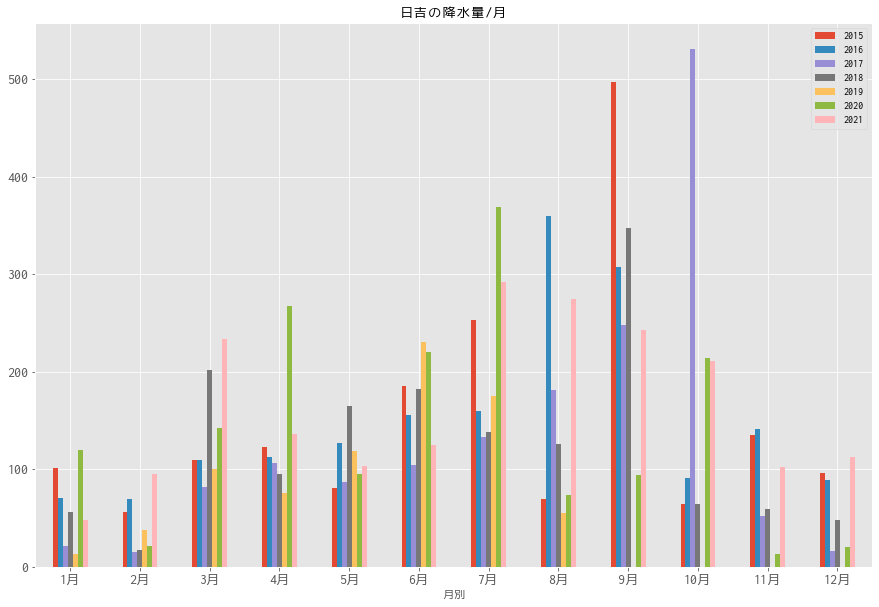

In [10]:
""" 月毎の合計降雨量 """
total = df.resample('M').sum()


def create_year_df(df, yyyy=2015):
    """ 特定の年を抽出して、indexを月とするDataFrameを作る """
    df_name = f'w{yyyy}'
    df_name = df[df.index.year == yyyy] 
    df_name.index = ['1月','2月','3月','4月','5月','6月',
                   '7月','8月','9月','10月','11月','12月']     
    df_name.columns = [yyyy]
    return df_name


# totalデータフレームめコピーを作成する。
total_copy = total.copy()
# 空のDataFrameを作成。
new_df = pd.DataFrame(index=[], columns=[])
# 月をIndexとするDataFrameを作成。
for y in range(2015, 2022,1):
    df_name = y
    df_name = create_year_df(total_copy, y)
    new_df = pd.concat([new_df, df_name], axis=1)
    
# 確認のため。
# print(new_df)

new_df.plot.bar(title='日吉の降水量/月', xlabel='月別', rot=0, figsize=(15,10), fontsize='14')
plt.savefig('降水量.png')




<AxesSubplot:title={'center':'日吉の降水日数/月'}, xlabel='月別'>

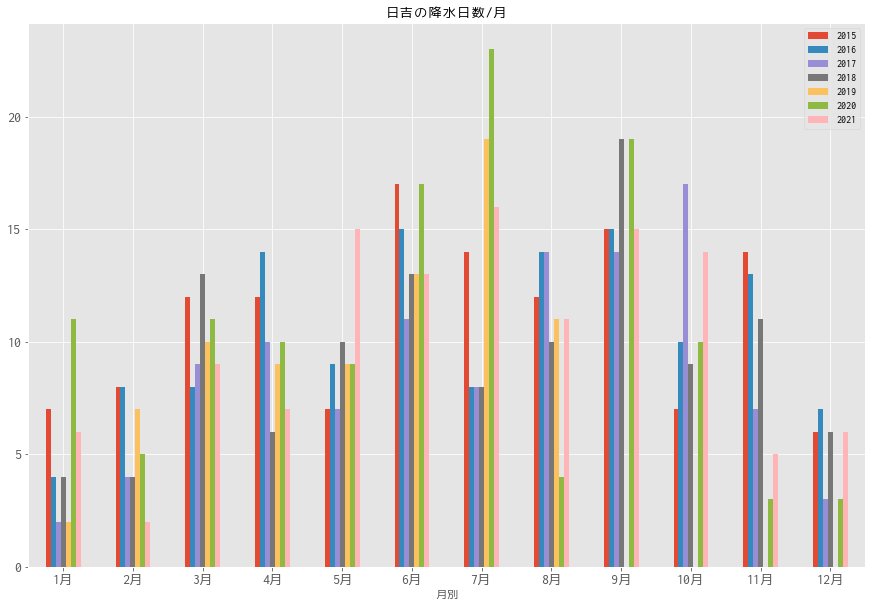

In [11]:
""" 降水量が0以上の日をカウント """
count = df[df['降水量']>0].resample('M').count()

# totalデータフレームめコピーを作成する。
count_copy = count.copy()
# 空のDataFrameを作成。
new_df = pd.DataFrame(index=[], columns=[])
# 月をIndexとするDataFrameを作成。
for y in range(2015, 2022,1):
    df_name = y
    df_name = create_year_df(count_copy, y)
    new_df = pd.concat([new_df, df_name], axis=1)
    
# 確認のため。
# print(new_df)

new_df.plot.bar(title='日吉の降水日数/月', xlabel='月別', rot=0, figsize=(15,10), fontsize='14')
